# Project 1
## Cardiovascular Disease and Risk Factors
### Team 6
* Andrew Sooklall
* Varun Athreya
* Robert Mendoza
* Zane Lynch
* Guisha Ceus


In [1]:
#import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

#import extras
import requests
from scipy.stats import linregress
import time

# #import api
import gmaps

# # Import API key
from config import weather_api_key
from config import g_key

In [2]:
#import CSV(s)
base_df = pd.read_csv("Resources/cvd_per_100k.csv")
base_df = base_df.rename(columns={'Location':'State'})
base_df

,State,Capital,Male Deaths,Female Deaths,Total Deaths,Cigarette Users,Hypertension,Obesity
0,Alabama,Montgomery,283.0,175.5,458.5,20900,41900,37100
1,Alaska,Juneau,172.5,99.4,271.9,21000,31800,34700
2,Arizona,Phoenix,178.4,109.8,288.2,15600,30700,30100
3,Arkansas,Little Rock,277.8,178.9,456.7,22300,41300,36000
4,California,Sacramento,181.2,111.4,292.6,11300,28400,25700
5,Colorado,Denver,153.1,97.4,250.5,14600,25900,23100
6,Connecticut,Hartford,178.5,113.4,291.9,12700,30500,27500
7,Delaware,Dover,197.1,127.3,324.4,17000,34900,32400
8,District of Columbia,District of Colombia,243.5,149.2,392.7,14300,26700,23000
9,Florida,Honolulu,186.2,111.6,297.8,16100,34600,28900


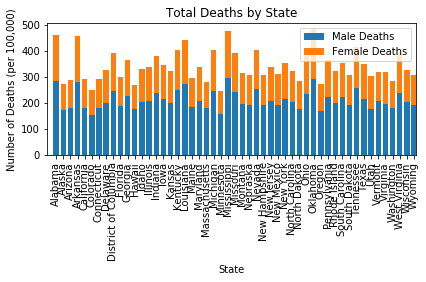

In [3]:
base_df[['Male Deaths', 'Female Deaths']].plot(kind='bar', rot=90, width=0.75, stacked=True,)
plt.xticks(np.arange(len(base_df)), list(base_df['State']))
plt.xlim(-1.25, len(base_df)-0.75)
plt.title('Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Number of Deaths (per 100,000)')
plt.tight_layout(pad=1)
# plt.figure(figsize=(40,40),dpi=80)

plt.savefig('CVD_plots/mf_bar.png')

plt.show()

# analysis

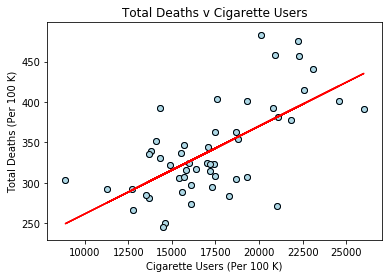

The r squared is: 0.42552160556980134
The p value is: 2.1454877465306693e-07
The line equation is: y = 0.01x + 152.63


In [4]:
x_values = base_df['Cigarette Users']
y_values = base_df['Total Deaths']
(slope, intercept, cig_rvalue, cig_pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_cig = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.scatter(base_df["Cigarette Users"],base_df["Total Deaths"], c="lightblue", edgecolor="black")
plt.title("Total Deaths v Cigarette Users")
plt.xlabel('Cigarette Users (Per 100 K)')
plt.ylabel('Total Deaths (Per 100 K)')

plt.savefig('CVD_plots/death_v_cig.png')

plt.show()

#r2
print(f'The r squared is: {cig_rvalue**2}')
print(f'The p value is: {cig_pvalue}')
print(f'The line equation is: {line_eq_cig}')



# Analysis for Cigs
* 1
* 2
* 3

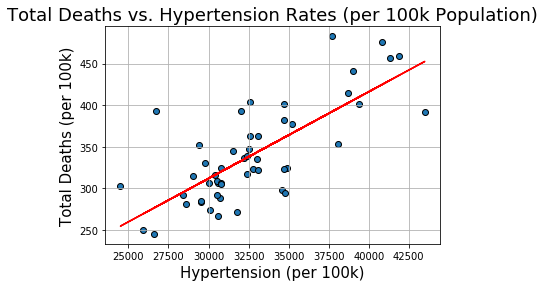

The r squared is: 0.5632791853418943
The p value is: 2.2797228638972336e-10
The line equation is: y = 0.01x + -0.59


In [5]:
#linear regression
x_values_htn = base_df['Hypertension']
y_values_htn = base_df['Total Deaths']
(htn_slope, htn_intercept, htn_rvalue, htn_pvalue, htn_stderr) = linregress(x_values_htn, y_values_htn)
regress_values_htn = x_values_htn * htn_slope + htn_intercept
line_eq_htn = "y = " + str(round(htn_slope,2)) + "x + " + str(round(htn_intercept,2))
                       
# total deaths vs hypertension
deaths_vs_htn = plt.scatter(base_df['Hypertension'],base_df['Total Deaths'],marker='o',edgecolor='black')
plt.plot(x_values_htn,regress_values_htn,"r-")
plt.grid()
plt.title('Total Deaths vs. Hypertension Rates (per 100k Population)',size=18)
plt.xlabel('Hypertension (per 100k)',size=15)
plt.ylabel("Total Deaths (per 100k)",size=15)

plt.savefig('CVD_plots/deaths_v_htn.png')

plt.show()


#r2
print(f'The r squared is: {htn_rvalue**2}')
print(f'The p value is: {htn_pvalue}')
print(f'The line equation is: {line_eq_htn}')

# Analysis for HTN
* 1
* 2
* 3

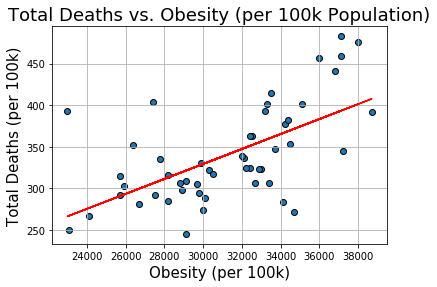

The r squared is: 0.3687160277203942
The p value is: 2.3079580843870332e-06
The line equation is: y = 0.01x + 59.48


In [6]:
#linear regression
x_values_obe = base_df['Obesity']
y_values_obe = base_df['Total Deaths']
(obe_slope, obe_intercept, obe_rvalue, obe_pvalue, obe_stderr) = linregress(x_values_obe, y_values_obe)
regress_values_obe = x_values_obe * obe_slope + obe_intercept
line_eq_obe = "y = " + str(round(obe_slope,2)) + "x + " + str(round(obe_intercept,2))
                       
# total deaths vs hypertension
deaths_vs_obesity = plt.scatter(base_df['Obesity'],base_df['Total Deaths'],marker='o',edgecolor='black')
plt.plot(x_values_obe,regress_values_obe,"r-")
plt.grid()
plt.title('Total Deaths vs. Obesity (per 100k Population)',size=18)
plt.xlabel('Obesity (per 100k)',size=15)
plt.ylabel("Total Deaths (per 100k)",size=15)

plt.savefig('CVD_plots/deaths_v_obe.png')

plt.show()


#r2
print(f'The r squared is: {obe_rvalue**2}')
print(f'The p value is: {obe_pvalue}')
print(f'The line equation is: {line_eq_obe}')

# Total Deaths v Obesity Analysis
* 1
* 2

In [7]:
# Capital Cities 

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&zip="


In [8]:
#list of capitals
# capital_cities = ["Montgomery", "Juneau", "Phoenix", "Little Rock", "Sacramento", "Denver", "Hartford", "Dover", "District of Columbia", "Tallahassee", "Atlanta", "Honolulu", "Boise", "Springfield", "Indianapolis", "Des Moines", "Topeka", "Frankfort", "Baton Rouge", "Augusta", "Annapolis", "Boston", "Lansing", "St. Paul", "Jackson", "Jefferson City", "Helena", "Lincoln", "Carson City", "Concord", "Trenton", "Santa Fe", "Albany", "Raleigh", "Bismarck", "Columbus", "Oklahoma City", "Salem", "Harrisburg", "Providence", "Columbia", "Pierre", "Nashville", "Austin", "Salt Lake City", "Montpelier", "Richmond", "Olympia", "Charleston", "Madison", "Cheyenne"]
zipcodes = ['36101','99801','85001','72201','94203','80201','06101','19901','20001','32301','30301','96801','83701','62701','46201','50301','66601','40601','70801','04330','21401','02108','48901','55101','39201','65101','59601','68501','89701','03301','08601','87501','12201','27601','58501','43201','73101','97301','17101','02901','29201','57501','37201','73301','84101','05601','23218','98501','25301','53701','82001']
# set up lists to hold reponse info
cities = []
lat = []
lng = []
temp = []

# Loop through the list of cities and perform a request for data on each
for zipcode in zipcodes:
    response = requests.get(query_url + zipcode + ',us').json()
    cities.append(response["name"])
    temp.append(response['main']['temp'])
    lat.append(response['coord']['lat'])
    lng.append(response['coord']['lon'])
    time.sleep(1)



In [9]:
#update dataframe
base_df['City']=cities
base_df['Lat']=lat
base_df['Lng']=lng
base_df['Temperature']=temp

#print updated DF
base_df=base_df[['State','City','Lat','Lng','Male Deaths', 'Female Deaths', 'Total Deaths',
       'Cigarette Users', 'Hypertension', 'Obesity','Temperature']]

base_df

,State,City,Lat,Lng,Male Deaths,Female Deaths,Total Deaths,Cigarette Users,Hypertension,Obesity,Temperature
0,Alabama,Montgomery,32.36,-86.26,283.0,175.5,458.5,20900,41900,37100,93.60
1,Alaska,Juneau,58.36,-134.53,172.5,99.4,271.9,21000,31800,34700,50.76
2,Arizona,Phoenix,33.45,-112.07,178.4,109.8,288.2,15600,30700,30100,88.54
3,Arkansas,Little Rock,34.75,-92.28,277.8,178.9,456.7,22300,41300,36000,90.27
4,California,Sacramento,38.58,-121.49,181.2,111.4,292.6,11300,28400,25700,70.20
5,Colorado,Denver,39.73,-104.86,153.1,97.4,250.5,14600,25900,23100,49.55
6,Connecticut,Hartford,41.78,-72.68,178.5,113.4,291.9,12700,30500,27500,69.91
7,Delaware,Dover,39.16,-75.50,197.1,127.3,324.4,17000,34900,32400,76.39
8,District of Columbia,Washington,38.91,-77.02,243.5,149.2,392.7,14300,26700,23000,81.25
9,Florida,Tallahassee,30.43,-84.26,186.2,111.6,297.8,16100,34600,28900,83.55


In [10]:
##### config
gmaps.configure(api_key=g_key)

#total death heatmap
locations = base_df[["Lat", "Lng"]]
deaths = base_df['Total Deaths'].astype(float)


# Plot Heatmap
fig = gmaps.figure()
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=deaths, 
                                 dissipating=False, max_intensity=deaths.max(),
                                 point_radius=2)
# Add layer
fig.add_layer(heat_layer)
# Display figure
print('Heatmap for Total Deaths')
fig

Heatmap for Total Deaths


Figure(layout=FigureLayout(height='420px'))

In [11]:
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Temperature</dt><dd>{Temperature}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
city_info = [info_box_template.format(**row) for index, row in base_df.iterrows()]
locations = base_df[["Lat", "Lng"]]

In [12]:
city_markers = gmaps.marker_layer(locations, info_box_content=city_info)
fig.add_layer(city_markers)

fig

Figure(layout=FigureLayout(height='420px'))

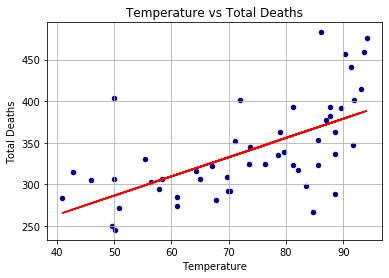

The r squared is: 0.3834790762857038
The p value is: 1.2696766765790133e-06
The line equation is: y = 2.31x + 170.88


In [13]:
#linear regression
x_values_temp = base_df['Temperature']
y_values_temp = base_df['Total Deaths']
(temp_slope, temp_intercept, temp_rvalue, temp_pvalue, temp_stderr) = linregress(x_values_temp, y_values_temp)
regress_values_temp = x_values_temp * temp_slope + temp_intercept
line_eq_temp = "y = " + str(round(temp_slope,2)) + "x + " + str(round(temp_intercept,2))

# Total Deaths vs Temperature
base_df.plot(kind='scatter', x='Temperature', y='Total Deaths', c='DarkBlue')
plt.plot(x_values_temp,regress_values_temp,"r-")
plt.title('Temperature vs Total Deaths')
plt.xlabel('Temperature')
plt.ylabel('Total Deaths')
plt.grid()

plt.savefig('CVD_plots/deaths_v_temp.png')

plt.show()

print(f'The r squared is: {temp_rvalue**2}')
print(f'The p value is: {temp_pvalue}')
print(f'The line equation is: {line_eq_temp}')

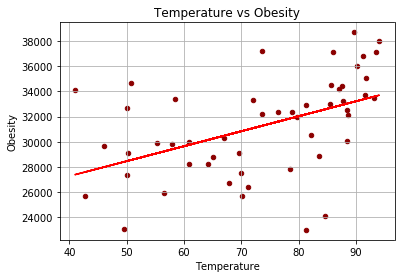

The r squared is: 0.3834790762857038
The p value is: 1.2696766765790133e-06
The line equation is: y = 2.31x + 170.88


In [14]:
#linear regression
x_values_tempobe = base_df['Temperature']
y_values_tempobe = base_df['Obesity']
(tempobe_slope, tempobe_intercept, tempobe_rvalue, tempobe_pvalue, tempobe_stderr) = linregress(x_values_tempobe, y_values_tempobe)
regress_values_tempobe = x_values_tempobe * tempobe_slope + tempobe_intercept
line_eq_tempobe = "y = " + str(round(tempobe_slope,2)) + "x + " + str(round(tempobe_intercept,2))

# Obesity vs tempobeerature
base_df.plot(kind='scatter', x='Temperature', y='Obesity', c='DarkRed')
plt.plot(x_values_tempobe,regress_values_tempobe,"r-")
plt.title('Temperature vs Obesity')
plt.xlabel('Temperature')
plt.ylabel('Obesity')
plt.grid()

plt.savefig('CVD_plots/obe_v_temp.png')

plt.show()

print(f'The r squared is: {temp_rvalue**2}')
print(f'The p value is: {temp_pvalue}')
print(f'The line equation is: {line_eq_temp}')